In [10]:
pip install citipy

  Using cached https://files.pythonhosted.org/packages/3b/d0/59721d0f3954781488aac17ee4a40412d0a3547e98bb16377a09c39a2807/citipy-0.0.5.tar.gz
  Using cached https://files.pythonhosted.org/packages/00/3d/bd727d025b1706798aae14da3f69fc7d5a8639dc9e0eba37c7dcd43eb03e/kdtree-0.16-py2.py3-none-any.whl
  Stored in directory: /Users/andreavl/Library/Caches/pip/wheels/6f/07/0d/0392639cf1c10376f59decd06775c0e085ca2458c6036c1028
Successfully built citipy
Note: you may need to restart the kernel to use updated packages.


Your objective is to build a series of scatter plots to showcase the following relationships:

Temperature (F) vs. Latitude

Humidity (%) vs. Latitude

Cloudiness (%) vs. Latitude

Wind Speed (mph) vs. Latitude

Your final notebook must:

Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
Perform a weather check on each of the cities using a series of successive API calls.
Include a print log of each city as it's being processed with the city number and city name.
Save both a CSV of all data retrieved and png images for each scatter plot.

As final considerations:

Create a new GitHub repository for this project called API-Challenge (note the kebab-case). Do not add to an existing repo

You must complete your analysis using a Jupyter notebook.
You must use the Matplotlib or Pandas plotting libraries.
You must include a written description of three observable trends based on the data.
You must use proper labeling of your plots, including aspects like: Plot Titles (with date of analysis) and Axes Labels.
See Example Solution for a reference on expected format.

Where do you request the API key? Which Weather API in particular will you need? What URL endpoints does it expect? What JSON structure does it respond with? Before you write a line of code, you should be aiming to have a crystal clear understanding of your intended outcome.

# Preparation

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import openweathermapy as owm



In [11]:
from api_keys import api_key
from citipy import citipy


In [12]:
# donde se va a guardar
output_data_file = "output_data/cities.csv"

# rango de las ciudades 
lat_range = (-90, 90)
lng_range = (-180, 180)

In [13]:
lat_lngs = []
cities = []

# random set
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# ciudad
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    #Agregar si es diferente
    if city not in cities:
        cities.append(city)

len(cities)

617

In [14]:
# diccionario
settings = {
    "units": "imperial", 
    "appid": api_key
}

# df debe de coincidir con lo que quieres que traiga la api
WeatherPy_df = pd.DataFrame(columns = ["City","Cloudiness", "Country", "Date", "Max Temp", 
                                       "Wind Speed", "Lat","Lng", "Humidity"])

# API call

In [15]:
# llamadas a la api
count = 1
# detectar cuantas ciudades no tienenn info
err = 0 
# numero de sets
sets = 0 
# df
index = 0 

#Get current time
t0 = time.time()

print(f'Start Data Retrieval \n ........................')
for city in cities:
    try:
        city1 = city.replace(" ", "%20") # no jala si tiene espacio
        print(f'Processing Record {count} of Set {sets} | {city}' )
        city_stats = owm.get_current(city, **settings)
        WeatherPy_df.set_value(index, "City", city_stats["name"])
        WeatherPy_df.set_value(index, "Cloudiness", city_stats("clouds.all"))
        WeatherPy_df.set_value(index, "Country", city_stats("sys.country"))
        WeatherPy_df.set_value(index, "Date", city_stats("dt"))
        WeatherPy_df.set_value(index, "Max Temp", city_stats("main.temp_max"))
        WeatherPy_df.set_value(index, "Wind Speed", city_stats("wind.speed"))
        WeatherPy_df.set_value(index, "Lat", city_stats("coord.lat"))
        WeatherPy_df.set_value(index, "Lng", city_stats("coord.lon"))
        WeatherPy_df.set_value(index, "Humidity", city_stats("main.humidity"))
        index = index +1 
    except Exception as e:
        print(e)
        err= err+1
    count = count+1
    if count == 51: # clave: loop to limit 50 API calls per minute. The OpenWeatherMap API limit is 60 calls/min
        t1=time.time()
        count = 1 
        sets = sets+1
        time.sleep(60-(t1-t0))
        t0=time.time()

print("final")
print(f'sin data para {err}')


Start Data Retrieval 
 ........................
Processing Record 1 of Set 0 | sakakah


//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:23: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
//anaconda3/lib/python3.7/site-packages/ipyke

Processing Record 2 of Set 0 | matata
Processing Record 3 of Set 0 | lima
Processing Record 4 of Set 0 | the valley
Processing Record 5 of Set 0 | humaita
Processing Record 6 of Set 0 | davila
Processing Record 7 of Set 0 | tual
Processing Record 8 of Set 0 | matay
Processing Record 9 of Set 0 | qaanaaq
Processing Record 10 of Set 0 | hambantota
Processing Record 11 of Set 0 | amderma
HTTP Error 404: Not Found
Processing Record 12 of Set 0 | bluff
Processing Record 13 of Set 0 | ilulissat
Processing Record 14 of Set 0 | nurmahal
Processing Record 15 of Set 0 | hobart
Processing Record 16 of Set 0 | avarua
Processing Record 17 of Set 0 | falealupo
HTTP Error 404: Not Found
Processing Record 18 of Set 0 | katsuura
Processing Record 19 of Set 0 | hermanus
Processing Record 20 of Set 0 | dikson
Processing Record 21 of Set 0 | straumen
Processing Record 22 of Set 0 | grand river south east
HTTP Error 404: Not Found
Processing Record 23 of Set 0 | coihaique
Processing Record 24 of Set 0 | pa

Processing Record 41 of Set 3 | tyulgan
Processing Record 42 of Set 3 | kavieng
Processing Record 43 of Set 3 | finnsnes
Processing Record 44 of Set 3 | qaqortoq
Processing Record 45 of Set 3 | lompoc
Processing Record 46 of Set 3 | anadyr
Processing Record 47 of Set 3 | vyshestebliyevskaya
Processing Record 48 of Set 3 | inhambane
Processing Record 49 of Set 3 | warkworth
Processing Record 50 of Set 3 | daxian
HTTP Error 404: Not Found
Processing Record 1 of Set 4 | tumannyy
HTTP Error 404: Not Found
Processing Record 2 of Set 4 | tasiilaq
Processing Record 3 of Set 4 | nikolskoye
Processing Record 4 of Set 4 | sulangan
Processing Record 5 of Set 4 | havoysund
Processing Record 6 of Set 4 | bumba
Processing Record 7 of Set 4 | kerouane
Processing Record 8 of Set 4 | tuktoyaktuk
Processing Record 9 of Set 4 | cabo san lucas
Processing Record 10 of Set 4 | provideniya
Processing Record 11 of Set 4 | murray bridge
Processing Record 12 of Set 4 | am timan
Processing Record 13 of Set 4 | l

Processing Record 32 of Set 7 | okitipupa
Processing Record 33 of Set 7 | ouallam
Processing Record 34 of Set 7 | simao
Processing Record 35 of Set 7 | faya
Processing Record 36 of Set 7 | tanjong karang
HTTP Error 404: Not Found
Processing Record 37 of Set 7 | kulhudhuffushi
Processing Record 38 of Set 7 | mayumba
Processing Record 39 of Set 7 | hirara
Processing Record 40 of Set 7 | grand-santi
Processing Record 41 of Set 7 | xuddur
Processing Record 42 of Set 7 | cheremushskiy
Processing Record 43 of Set 7 | teya
Processing Record 44 of Set 7 | urumqi
Processing Record 45 of Set 7 | salaspils
Processing Record 46 of Set 7 | samalaeulu
HTTP Error 404: Not Found
Processing Record 47 of Set 7 | escanaba
Processing Record 48 of Set 7 | banepa
Processing Record 49 of Set 7 | mtinko
Processing Record 50 of Set 7 | saint anthony
Processing Record 1 of Set 8 | alofi
Processing Record 2 of Set 8 | barra do garcas
Processing Record 3 of Set 8 | igarka
Processing Record 4 of Set 8 | san onofre

Processing Record 22 of Set 11 | mogadishu
Processing Record 23 of Set 11 | ballater
Processing Record 24 of Set 11 | scottsburgh
HTTP Error 404: Not Found
Processing Record 25 of Set 11 | gamba
Processing Record 26 of Set 11 | grajau
Processing Record 27 of Set 11 | pangnirtung
Processing Record 28 of Set 11 | mendoza
Processing Record 29 of Set 11 | takapau
Processing Record 30 of Set 11 | le port
Processing Record 31 of Set 11 | linxia
Processing Record 32 of Set 11 | aykhal
Processing Record 33 of Set 11 | przhevalskoye
Processing Record 34 of Set 11 | sibut
Processing Record 35 of Set 11 | urucara
Processing Record 36 of Set 11 | trairi
Processing Record 37 of Set 11 | tammisaari
Processing Record 38 of Set 11 | fonte boa
Processing Record 39 of Set 11 | laizhou
Processing Record 40 of Set 11 | half moon bay
Processing Record 41 of Set 11 | vila franca do campo
Processing Record 42 of Set 11 | camacha
Processing Record 43 of Set 11 | evansville
Processing Record 44 of Set 11 | san

In [16]:

# GUARDAR CSV
WeatherPy_df.to_csv("WeatherPy.csv", encoding='utf-8', index=False)

#ver
#WeatherPy_df.head(10)

# Temperature (F) vs. Latitude

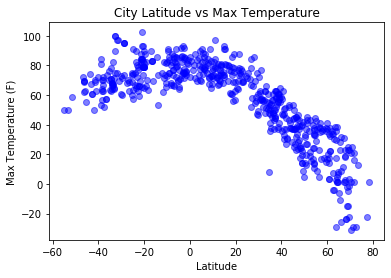

In [17]:
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Max Temp"], color='blue', alpha=0.5)

#LABELS Y TITLE
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs Max Temperature')

# GUARDAR
plt.savefig('Imagenes/# Temperature (F) vs. Latitude.png')

plt.show()

# Humidity (%) vs. Latitude

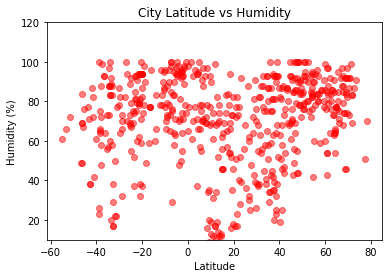

In [18]:
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Humidity"], color='r', alpha=0.5)

#LABELS Y TITLE
plt.ylim(10,120)
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs Humidity')

# GUARDAR
plt.savefig('Imagenes/Humidity (%) vs. Latitude.png')

plt.show()

# Cloudiness (%) vs. Latitude

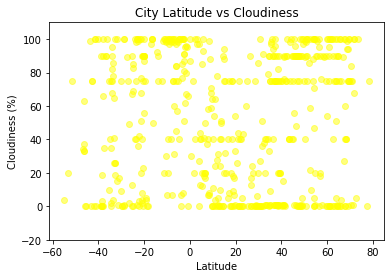

In [19]:
plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Cloudiness"], color='yellow', alpha=0.5)

#LABELS Y TITLE
plt.ylim(-20,(WeatherPy_df["Cloudiness"].max()+10))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs Cloudiness')

# GUARDAR
plt.savefig('Imagenes/Cloudiness (%) vs. Latitude.png')

plt.show()

# Wind Speed (mph) vs. Latitude

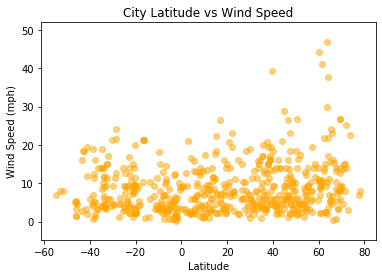

In [20]:

plt.scatter(WeatherPy_df["Lat"], WeatherPy_df["Wind Speed"], color='orange', alpha=0.5)

#LABELS Y TITLE
plt.ylim((WeatherPy_df["Wind Speed"].min()-5),(WeatherPy_df["Wind Speed"].max()+5))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs Wind Speed')

# GUARDAR
plt.savefig('Imagenes/Wind Speed (mph) vs. Latitude.png')

plt.show()